In [1]:
# load library and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('MonetaryPolicyRate_monthly.csv')
df

,Unnamed: 0,Mon-YY,Value,Year
0,0,Jan-90,18.50,1990.0
1,1,Feb-90,18.50,1990.0
2,2,Mar-90,18.50,1990.0
3,3,Apr-90,18.50,1990.0
4,4,May-90,18.50,1990.0
...,...,...,...,...
410,410,Mar-24,24.75,2024.0
411,411,Apr-24,24.75,2024.0
412,412,May-24,26.25,2024.0
413,413,Jun-24,26.25,2024.0


In [3]:
drop_cols=['Unnamed: 0','Year']
df=df.drop(drop_cols,axis=1)

In [4]:
df.columns=['Date','MPR']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    414 non-null    object 
 1   MPR     414 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.6+ KB


In [6]:
df.head()

,Date,MPR
0,Jan-90,18.5
1,Feb-90,18.5
2,Mar-90,18.5
3,Apr-90,18.5
4,May-90,18.5


In [7]:
df.Date=pd.to_datetime(df.Date,format='%b-%y')

In [8]:
# Summary statistics
df.describe()

,Date,MPR
count,414,414.000000
mean,2007-03-17 12:13:54.782608640,14.088164
min,1990-01-01 00:00:00,6.000000
25%,1998-08-08 18:00:00,12.000000
50%,2007-03-16 12:00:00,13.500000
75%,2015-10-24 06:00:00,16.000000
max,2024-06-01 00:00:00,26.250000
std,NaN,3.903235


In [9]:
df.dropna(axis=0,inplace=True)

## Plot MPR over time

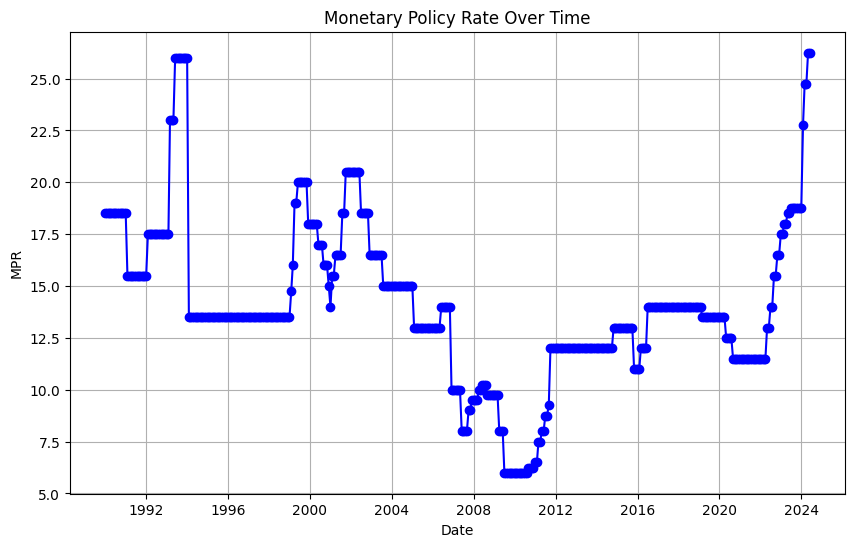

In [16]:
# Plot MPR over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['MPR'], marker='o', linestyle='-', color='b')
plt.title('Monetary Policy Rate Over Time')
plt.xlabel('Date')
plt.ylabel('MPR')
plt.grid(True)
plt.show()

## Regression Analysis on MPR Data

In [11]:
#Use linear regression to model the relationship between time  and MPR values .
# Perform linear regression
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(range(len(df)), df['MPR'])

# Print regression results
print(f"Slope of the trend line: {slope:.4f}")
print(f"Intercept of the trend line: {intercept:.4f}")
print(f"R-squared value: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

Slope of the trend line: -0.0101
Intercept of the trend line: 16.1823
R-squared value: 0.0966
P-value: 0.0000


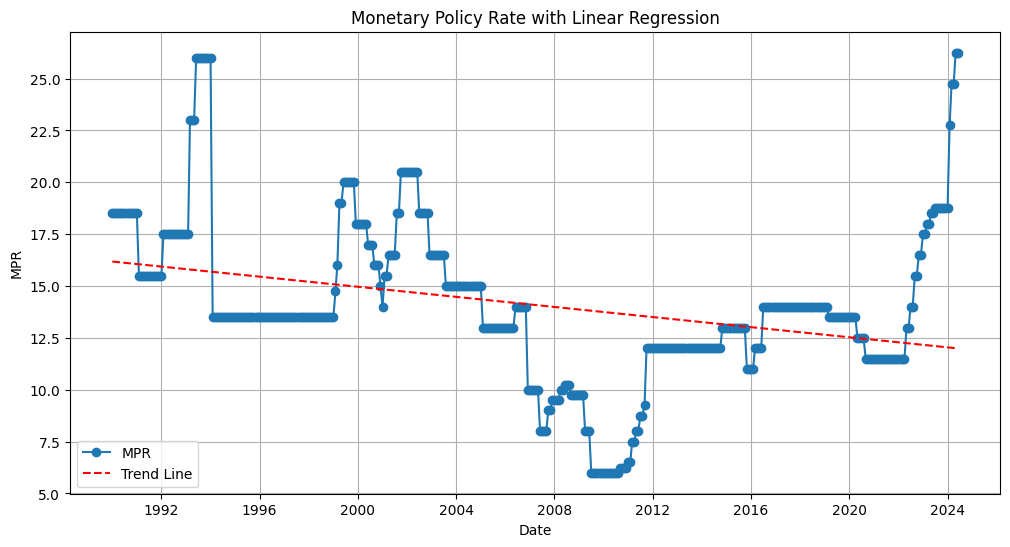

In [12]:
# Plot original data with regression line
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['MPR'], marker='o', linestyle='-', label='MPR')
plt.plot(df['Date'], intercept + slope * range(len(df)), color='red', linestyle='--', label='Trend Line')
plt.title('Monetary Policy Rate with Linear Regression')
plt.xlabel('Date')
plt.ylabel('MPR')
plt.legend()
plt.grid(True)
plt.show()

## results

 * The slope of the trend line shows how MPR values change over time. With a slope of -0.0101, it means that, on average, the MPR decreases by about 0.0101 units for each unit increase in time. Since the slope is negative, it shows a decreasing trend in MPR values over time in your dataset. This could indicate a period of loosening monetary policy or other factors leading to MPR reductions.

* The low R-squared value (0.0966) tells us the linear model with time alone as a predictor doesn't explain much of the variability in MPR values. This means other factors beyond time likely affect changes in MPR.

*  P-value Interpretation: The low p-value (0.0000) indicates that the observed relationship (negative trend in MPR over time) is statistically significant and unlikely to be due to random chance. 